# Uber Data Analysis

# Abstract

Here we will be working with Uber datset.This dataset contains approximately  2 million trips. In first section I will describe the project and then mention the research wquestions and finally we will report our conclusions.

## Overview

In this project we would like to understand customer trends in Uber data. Uber is one  of the most popular transportantion app. In 2018 they released this dataset /////

## Research Questions

In this project I will try to understand what is the most common travel day in uber data.
In this project I have chosen my research dataset as uber dataset. I found this subject interesting it will show travel time of uber driver.How many he/ she has traveled during weekdays or weekends why there is such difference between that period how it is possible to distinguish their difference. Why it is important to know for simple users like us to know the travel time of the uber driver?It will be helpful for researchers to do make some sort of conclusions about this datset which we have.They can make conclusions based on that do they need services like "Uber" more or they dont need it.
It is important what days are time pick period for people. Transport department could make conclusions for themselves like what transport are mostly in need for customers.If they analyze and conclude they could figure out for themselves uber is quite popular and it is important for everybody and it will imporve transport ways in different features for transportation.
Also it will help to give genral overwiev about the destination of our passangers what locations require more stops and what trasportations are more needed on those locations.
I got 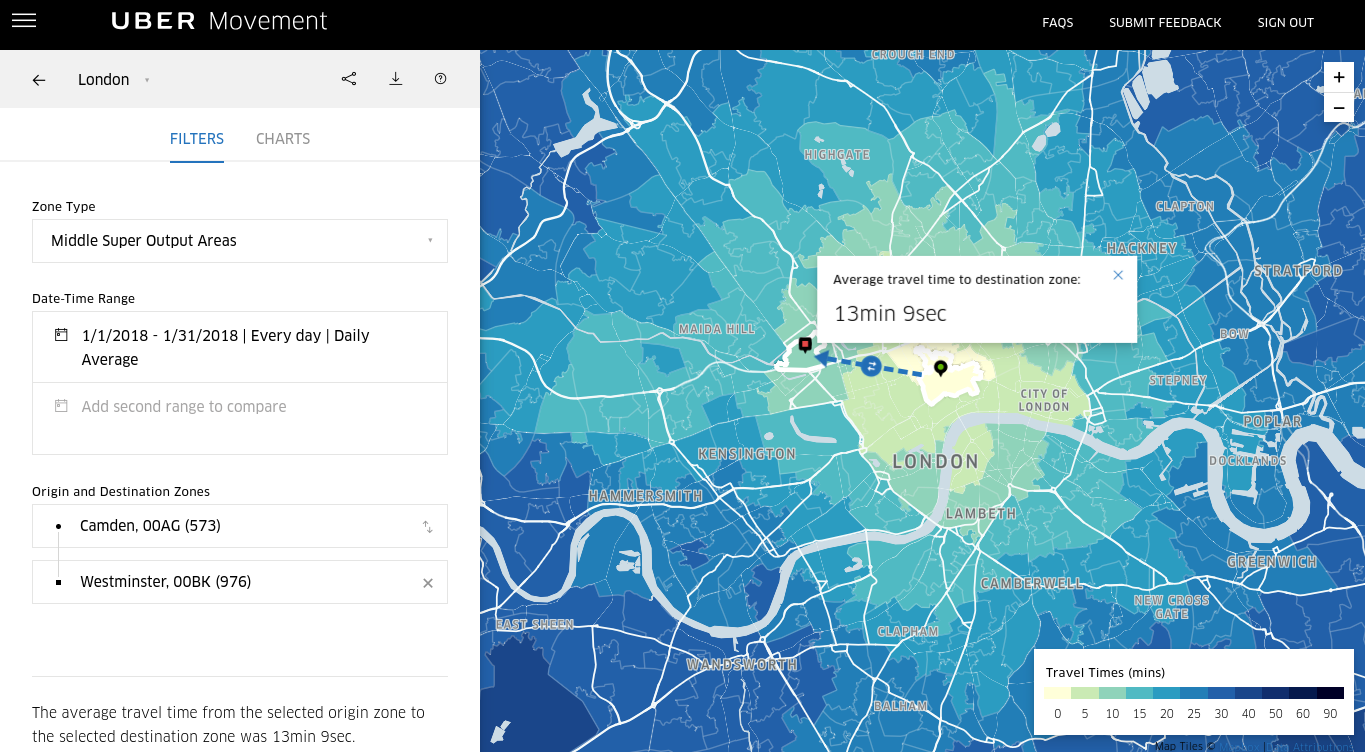
this image which shows uber movement throught the city .


In [ ]:
While I was doing this research analysis I have used histograms statistical element in order to view my results.

## Methodology & Analysis

In [1]:
import pandas as pd # here we import necessary libraries

In [6]:
uber_df = pd.read_csv("data/uber.csv", parse_dates=['date'], infer_datetime_format= True).sample(n = 10000)

In [7]:
uber_df.shape

(10000, 6)

In [8]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1128163 to 169724
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sourceid          10000 non-null  int64         
 1   dstid             10000 non-null  int64         
 2   mean_travel_time  10000 non-null  float64       
 3   time_of_week      10000 non-null  object        
 4   date              10000 non-null  datetime64[ns]
 5   trip              10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 546.9+ KB


## EDA (Exploratory Data Analysis)

In [9]:
uber_df.head()

,sourceid,dstid,mean_travel_time,time_of_week,date,trip
1128163,212,160,754.69,weekdays,2017-08-01,212-160
1245640,116,117,254.26,weekdays,2017-11-01,116-117
1787765,235,123,851.57,weekdays,2018-09-01,235-123
1802340,53,176,1402.21,weekdays,2018-09-01,53-176
783358,188,153,1067.25,weekends,2017-03-01,188-153


- check columns and what they stands for

In [11]:
import matplotlib.pyplot as plt

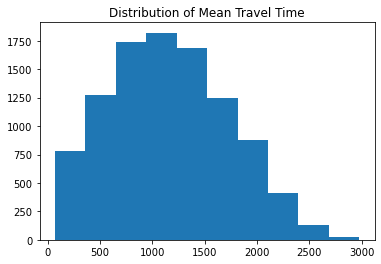

In [12]:
plt.hist(uber_df.mean_travel_time)

plt.title("Distribution of Mean Travel Time")
plt.draw()

- It looks like most of the mean travel times are around 1000 seconds. 

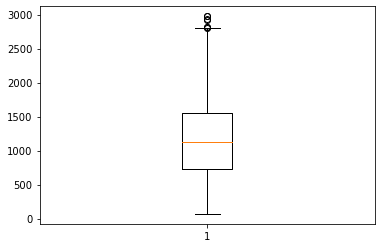

In [13]:
plt.boxplot(uber_df.mean_travel_time)
plt.draw()

- Median travel time is around 1000 seconds. There are some outliers after 25000

In [14]:
uber_df.time_of_week.value_counts()

weekdays    5012
weekends    4988
Name: time_of_week, dtype: int64

In the first look it might seem surprising that the number of rides in weekends are not more than the weekdays but note that weekdays include M,T,W, Th, F.

Goal: Notice that this data don't include the days of the trip. By using Python we can figure out the days by using date column in this dataset.

In [15]:
uber_df.date.dayofweek

AttributeError: 'Series' object has no attribute 'dayofweek'

In [16]:
import datetime

In [17]:
d = datetime.datetime.strptime('2016-03-03', '%Y-%m-%d')

In [19]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1128163 to 169724
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sourceid          10000 non-null  int64         
 1   dstid             10000 non-null  int64         
 2   mean_travel_time  10000 non-null  float64       
 3   time_of_week      10000 non-null  object        
 4   date              10000 non-null  datetime64[ns]
 5   trip              10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 546.9+ KB


In [21]:
uber_df['day'] = uber_df.date.map(lambda x: x.dayofweek)

In [22]:
uber_df

,sourceid,dstid,mean_travel_time,time_of_week,date,trip,day
1128163,212,160,754.69,weekdays,2017-08-01,212-160,1
1245640,116,117,254.26,weekdays,2017-11-01,116-117,2
1787765,235,123,851.57,weekdays,2018-09-01,235-123,5
1802340,53,176,1402.21,weekdays,2018-09-01,53-176,5
783358,188,153,1067.25,weekends,2017-03-01,188-153,2
...,...,...,...,...,...,...,...
2844888,248,124,940.92,weekends,2019-12-01,248-124,6
997830,252,200,2111.32,weekends,2017-04-01,252-200,5
2642366,140,222,877.42,weekends,2019-08-01,140-222,3
2449593,165,51,1710.05,weekends,2019-04-01,165-51,0


In [30]:
uber_df.sourceid.value_counts()

208    75
243    74
213    74
152    73
193    73
       ..
136    41
2      39
172    38
3      36
216    33
Name: sourceid, Length: 178, dtype: int64

Location 208 -- is the most common departure place.

In [31]:
uber_df.dstid.value_counts()

170    76
178    73
180    73
205    72
1      71
       ..
4      40
3      40
114    40
171    38
53     27
Name: dstid, Length: 178, dtype: int64

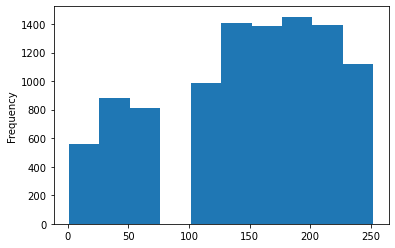

In [32]:
uber_df.dstid.plot(kind = 'hist')

Location with id==170 looks like the most common terminal destination

In [23]:
uber_df.day.value_counts()

4    1908
6    1442
0    1436
3    1421
1    1298
2    1260
5    1235
Name: day, dtype: int64

Looks like the most popular trip day is a Friday with 1908 trips.

In [24]:
import matplotlib.pyplot as plt

(array([ 784., 1277., 1737., 1821., 1689., 1249.,  874.,  413.,  131.,
          25.]),
 array([  69.31 ,  360.019,  650.728,  941.437, 1232.146, 1522.855,
        1813.564, 2104.273, 2394.982, 2685.691, 2976.4  ]),
 <a list of 10 Patch objects>)

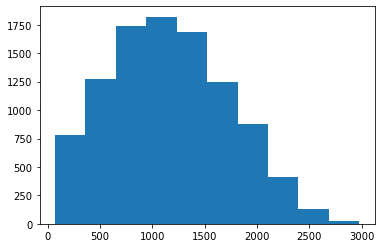

In [26]:
plt.hist(uber_df.mean_travel_time)

In [33]:
uber_df.trip.value_counts()[:10]

187-190    5
152-160    5
174-119    5
209-111    4
176-41     4
116-50     4
225-164    4
192-159    4
149-188    4
199-120    4
Name: trip, dtype: int64

In [36]:
uber_df.trip

1128163    212-160
1245640    116-117
1787765    235-123
1802340     53-176
783358     188-153
            ...   
2844888    248-124
997830     252-200
2642366    140-222
2449593     165-51
169724     162-126
Name: trip, Length: 10000, dtype: object

NameError: name 'df' is not defined

In [39]:
select_trips =uber_df.index.tolist()
select_trips

[1128163,
 1245640,
 1787765,
 1802340,
 783358,
 98823,
 2288395,
 1842162,
 1868650,
 2766257,
 1915905,
 1910209,
 2117636,
 1058716,
 2353907,
 2041217,
 2828250,
 1210594,
 39744,
 1531452,
 402113,
 2294821,
 1427796,
 1523043,
 2007487,
 97983,
 347911,
 640581,
 2766186,
 2446408,
 2752531,
 2224218,
 1529268,
 2761716,
 203014,
 1249321,
 221893,
 2215805,
 1989466,
 1615194,
 156030,
 816410,
 136290,
 1090957,
 1246481,
 1284365,
 2063860,
 1475708,
 215850,
 1506194,
 2451625,
 1337448,
 1223579,
 2452500,
 1263591,
 899330,
 2019096,
 1466161,
 706286,
 409120,
 1549163,
 1452016,
 442519,
 400704,
 2762428,
 480243,
 96819,
 776881,
 1874455,
 326438,
 212583,
 22462,
 1663069,
 58204,
 1684997,
 1914592,
 2307357,
 2832717,
 419732,
 1915977,
 2030019,
 2488281,
 548455,
 1027804,
 2548570,
 1560439,
 187954,
 1549756,
 32515,
 668542,
 1066615,
 2435236,
 813024,
 1402631,
 822496,
 1021434,
 559510,
 1727845,
 1189752,
 2738937,
 829307,
 1541306,
 1728081,
 174503,
 6

In [40]:
select_trips = uber_df.index.tolist()

# Data Analysis

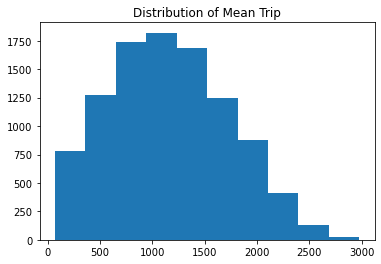

In [41]:
plt.hist(uber_df.mean_travel_time)

plt.title("Distribution of Mean Trip")
plt.draw()

Wow! The distribution of the mean_travel time is not normal and it is skewed. We can see the peak is around 1000 seconds.